<a href="https://raw.githubusercontent.com/ProducerMatt/SICP-solutions/main/1/cc/cc_11.svg"><img src="https://raw.githubusercontent.com/ProducerMatt/SICP-solutions/main/1/cc/cc_11.svg" alt="visualization of algorithm's data structures" width="200"/></a>

In [1]:
from matplotlib import pyplot as plt
from math import *
import pandas as pd
import numpy as np
import scipy.optimize as opt

%matplotlib inline

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 300

The algorithm in question

In [2]:
nodecount = 0 # define globally

def cc(r):
    """
    Take a range object and return a dataframe with columns
    "money", "ways", and "nodes".
    """
    df = pd.DataFrame(columns=["money", "ways", "nodes"])
    for i in r:
        df.loc[i - 1] = i, count_change(i), nodecount
        
    return df

def count_change(a, kinds=(50, 25, 10, 5, 1), root=True):
    """Return the number of ways to change amount a using coin kinds."""
    global nodecount
    if root:
        nodecount = 0
    else:
        nodecount += 1
    if a == 0:
        return 1
    if a < 0 or len(kinds) == 0:
        return 0
    d = kinds[0]
    return count_change(a, kinds[1:], root=False) + count_change(a - d, kinds, root=False)

Define start and end range. If you want to avoid off-by-one errors, make changes with the clear mind of a Buddhist monk.

In [3]:
startval = 1
endval = 100

In [4]:
df = cc(range(startval, (endval + 1), 1))

Pandas has convenient functions for calculating the percentage change of a column.

In [5]:
df.insert(loc=2, column="ways_pct", value=df.ways.pct_change())
df.insert(loc=4, column="nodes_pct", value=df.nodes.pct_change())

If you wanted to know how to make a dataset for an exponential function, here's how.

In [6]:
parabola = pd.DataFrame({'x': np.arange(startval,endval,1)})
parabola.insert(loc=0, column='y', value=(parabola['x'] ** 2.6))

I also left the golden ratio lying around. Who knows what kind of wacky hijinks might happen?

$$\frac{1 + \sqrt{5}}{2}$$

In [7]:
goldenratio = 1.618

# Actually plotting stuff

## Chapter IV: A New Change

Text(0.5, 1.0, 'Ways to make change for amount of cents')

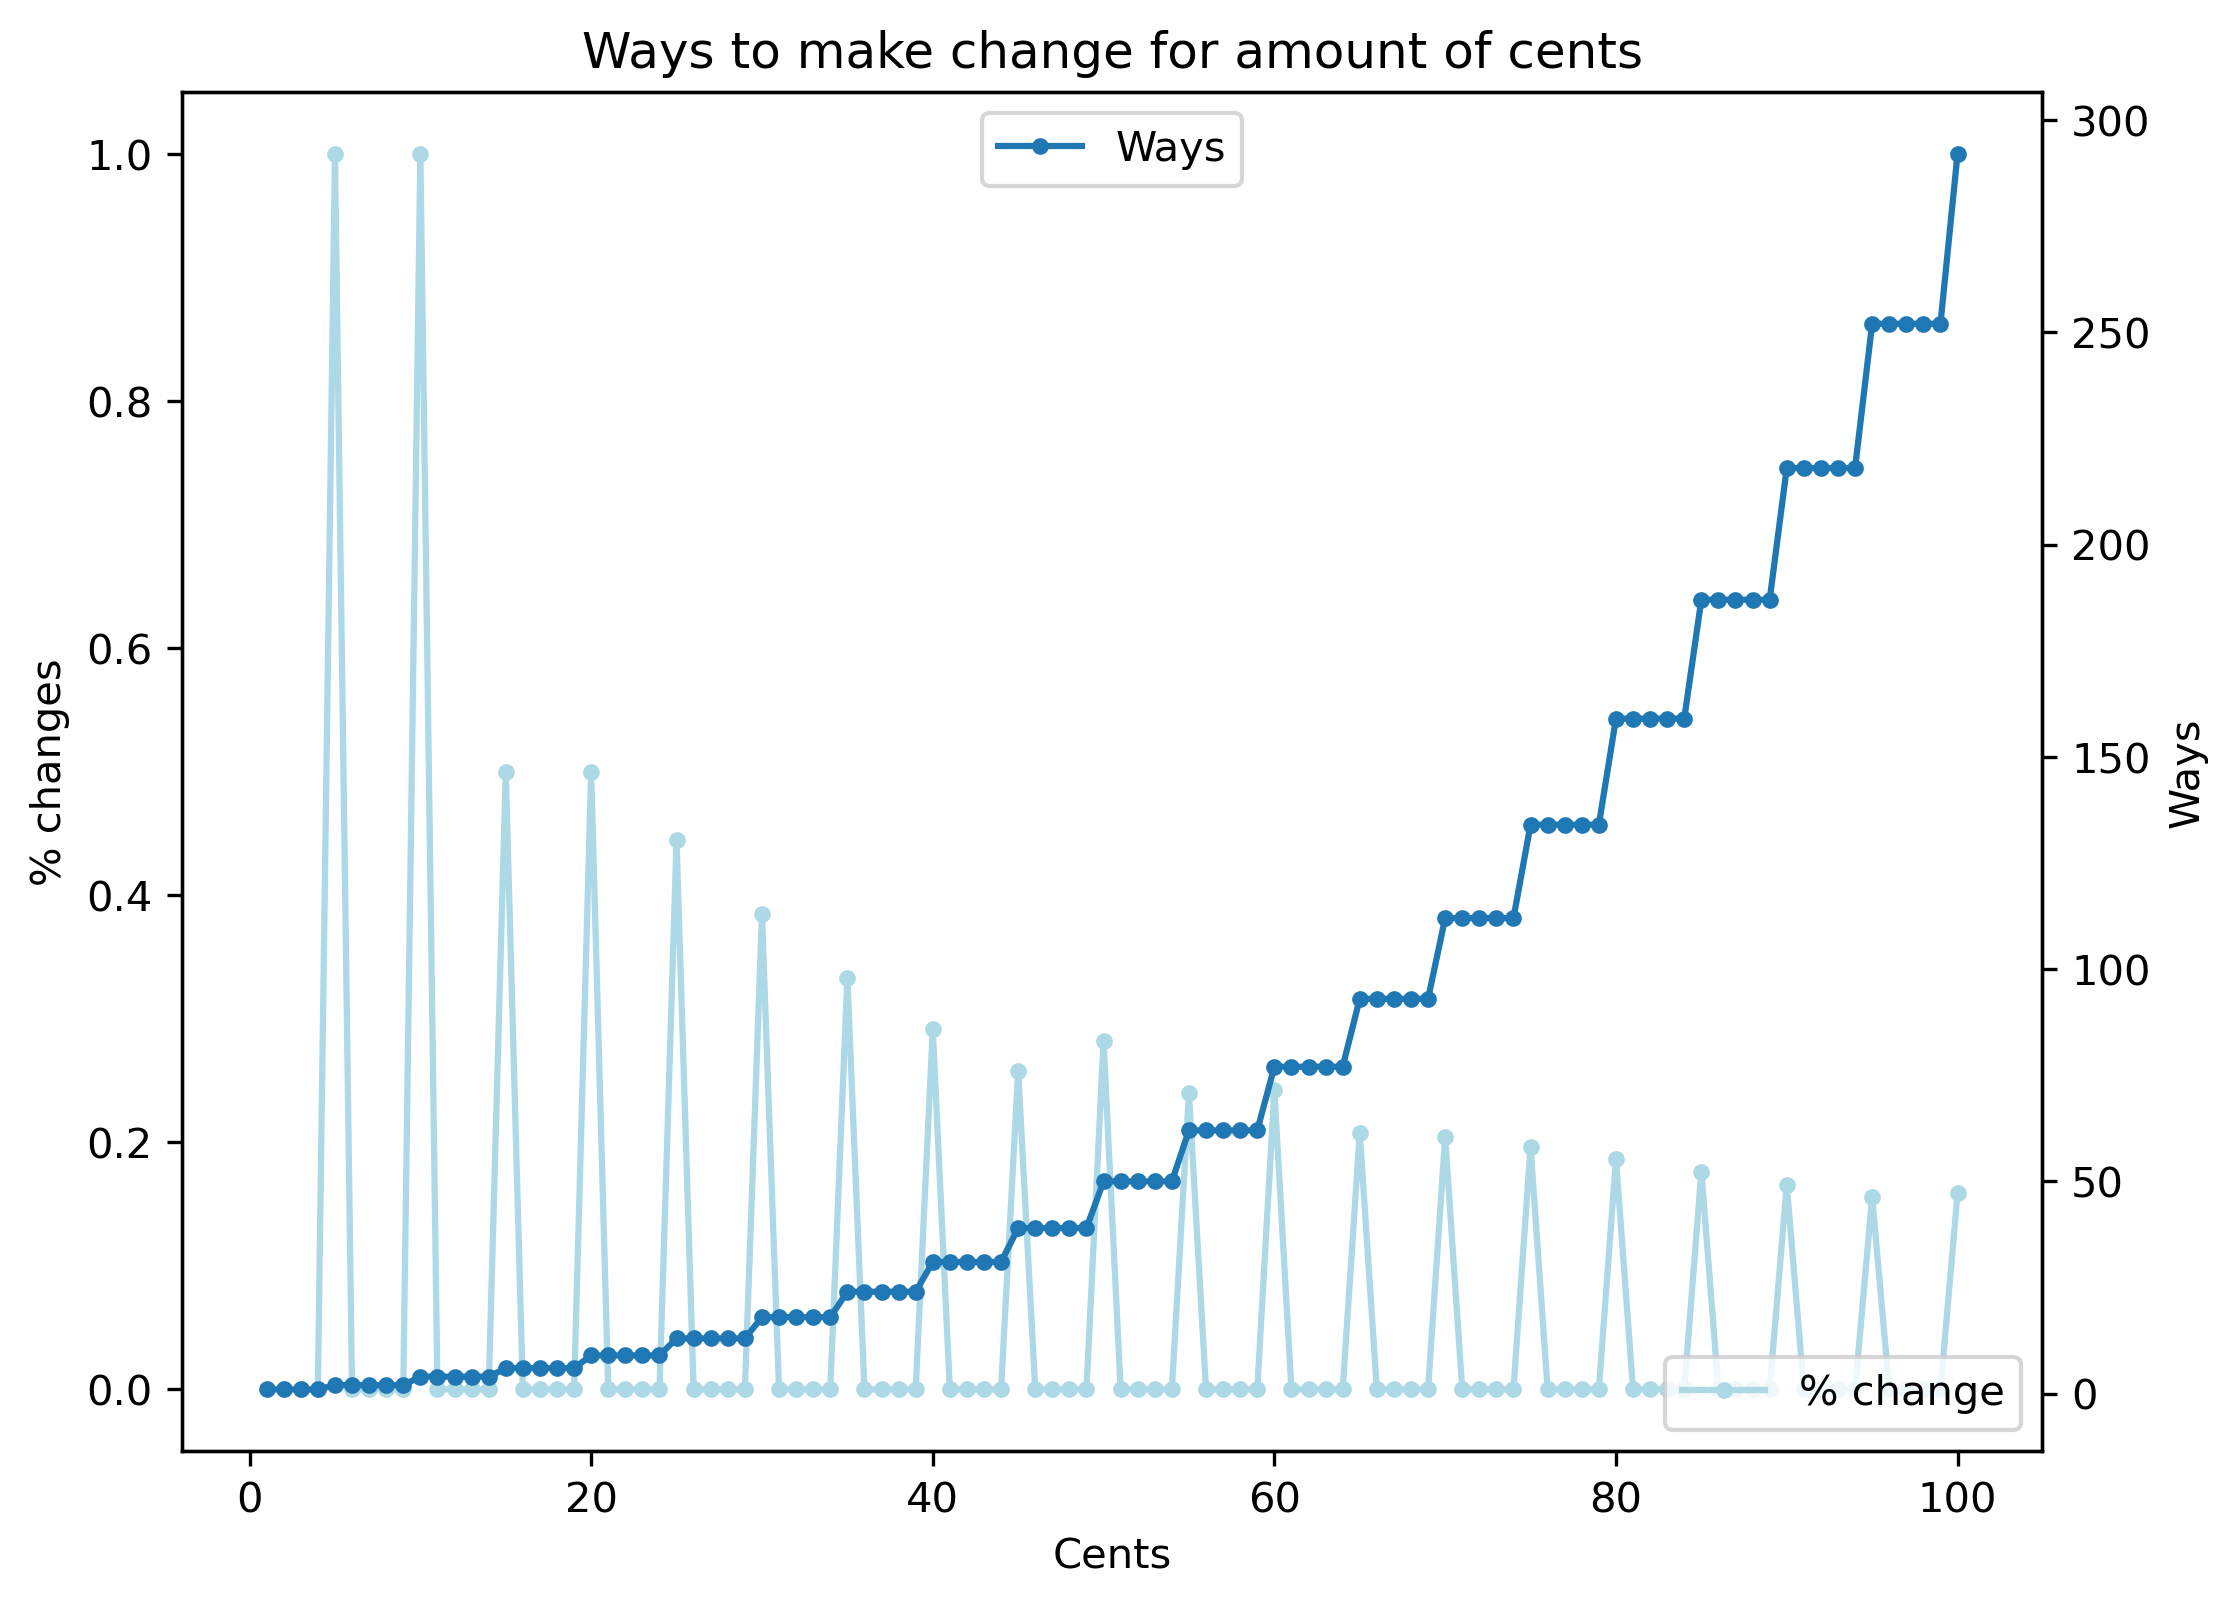

In [8]:
plt.plot(df.money, df.ways_pct, marker='o', ms=3, linestyle='solid', label="% change", color="lightblue"); plt.ylabel("% changes")
plt.xlabel("Cents")
plt.legend(loc="lower right")
plt.twinx()
plt.plot(df.money, df.ways, marker='o', ms=3, linestyle='solid', label="Ways"); plt.ylabel("Ways")
plt.xlabel("Cents")
plt.legend(loc="upper center")

plt.title("Ways to make change for amount of cents")

## Chapter V: The Function Calls Back

Text(0.5, 1.0, 'Count_change() function calls during execution')

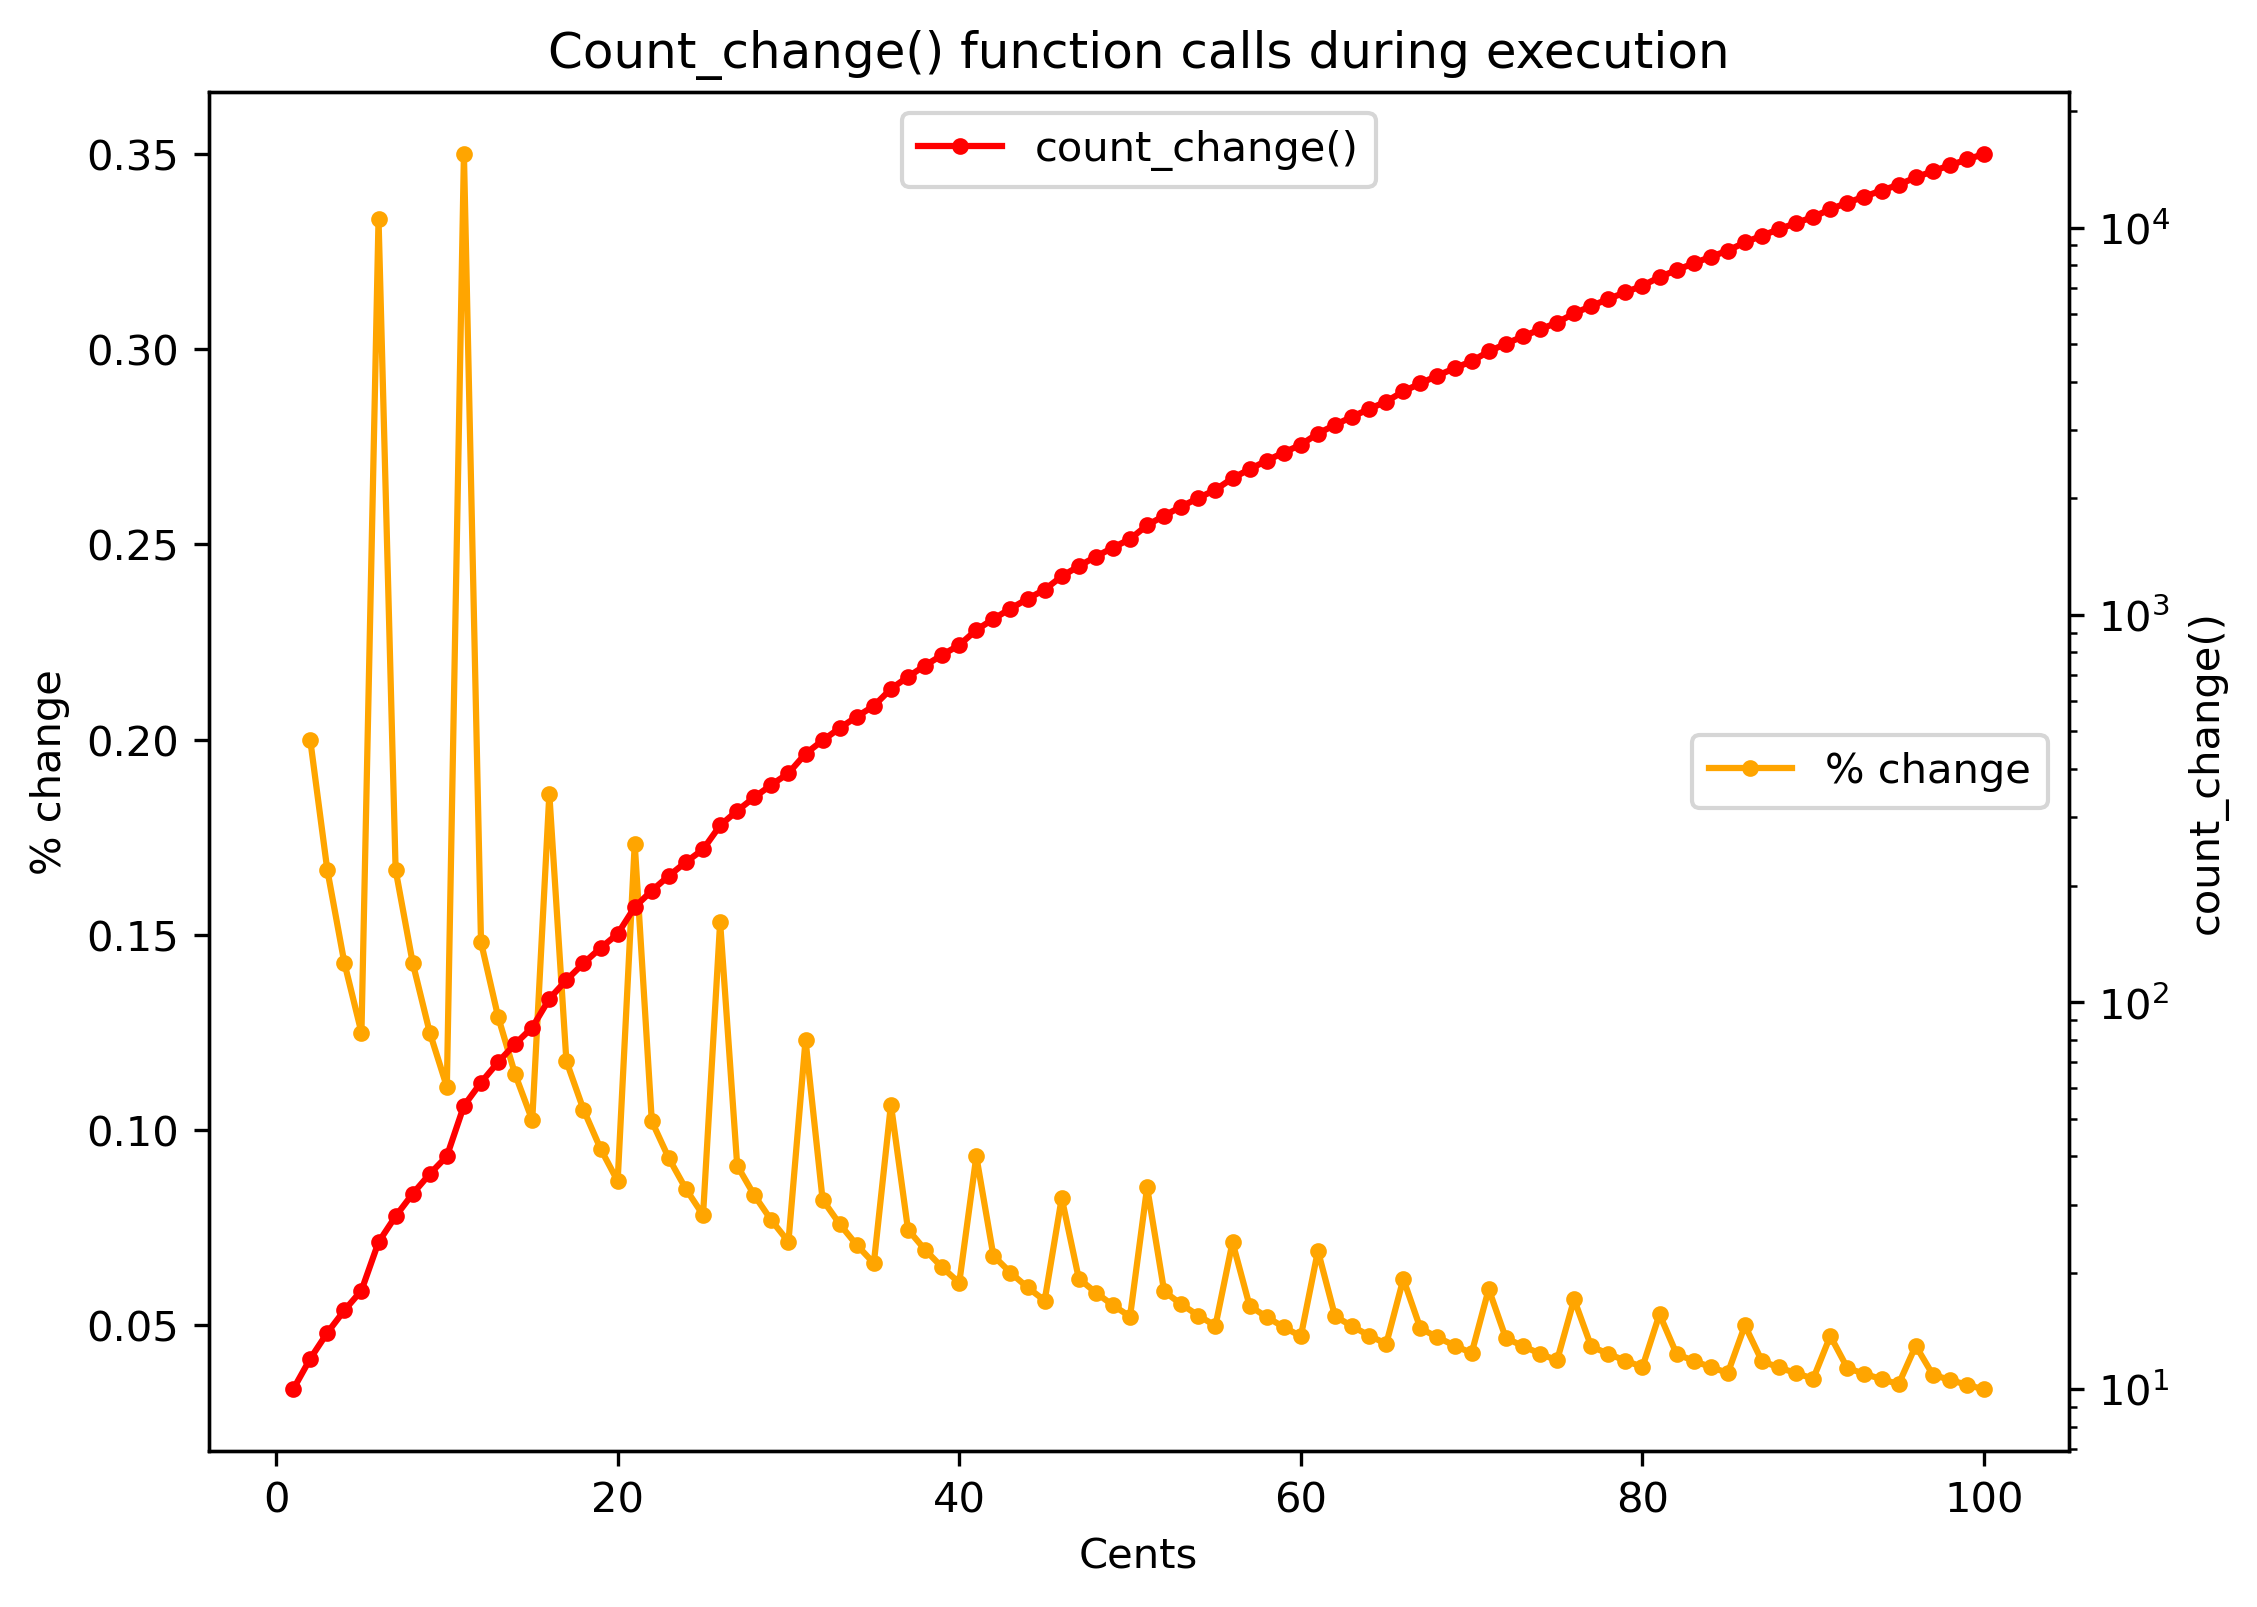

In [9]:
plt.plot(df.money, df.nodes_pct, color='orange', label="% change", marker='o', ms=3, linestyle='solid'); plt.ylabel("% change")
plt.xlabel("Cents")
plt.legend(loc='center right');
plt.twinx();
plt.plot(df.money, df.nodes, marker='o', ms=3, linestyle='solid', color='red', label="count_change()"); plt.ylabel("count_change()")
plt.xlabel("Cents")
plt.legend(loc="upper center"); plt.semilogy();
plt.title("Count_change() function calls during execution")

## Chapter VI: Chapter V but it's just the first part

Text(0.5, 1.0, 'zoom: calls for amounts 1-15')

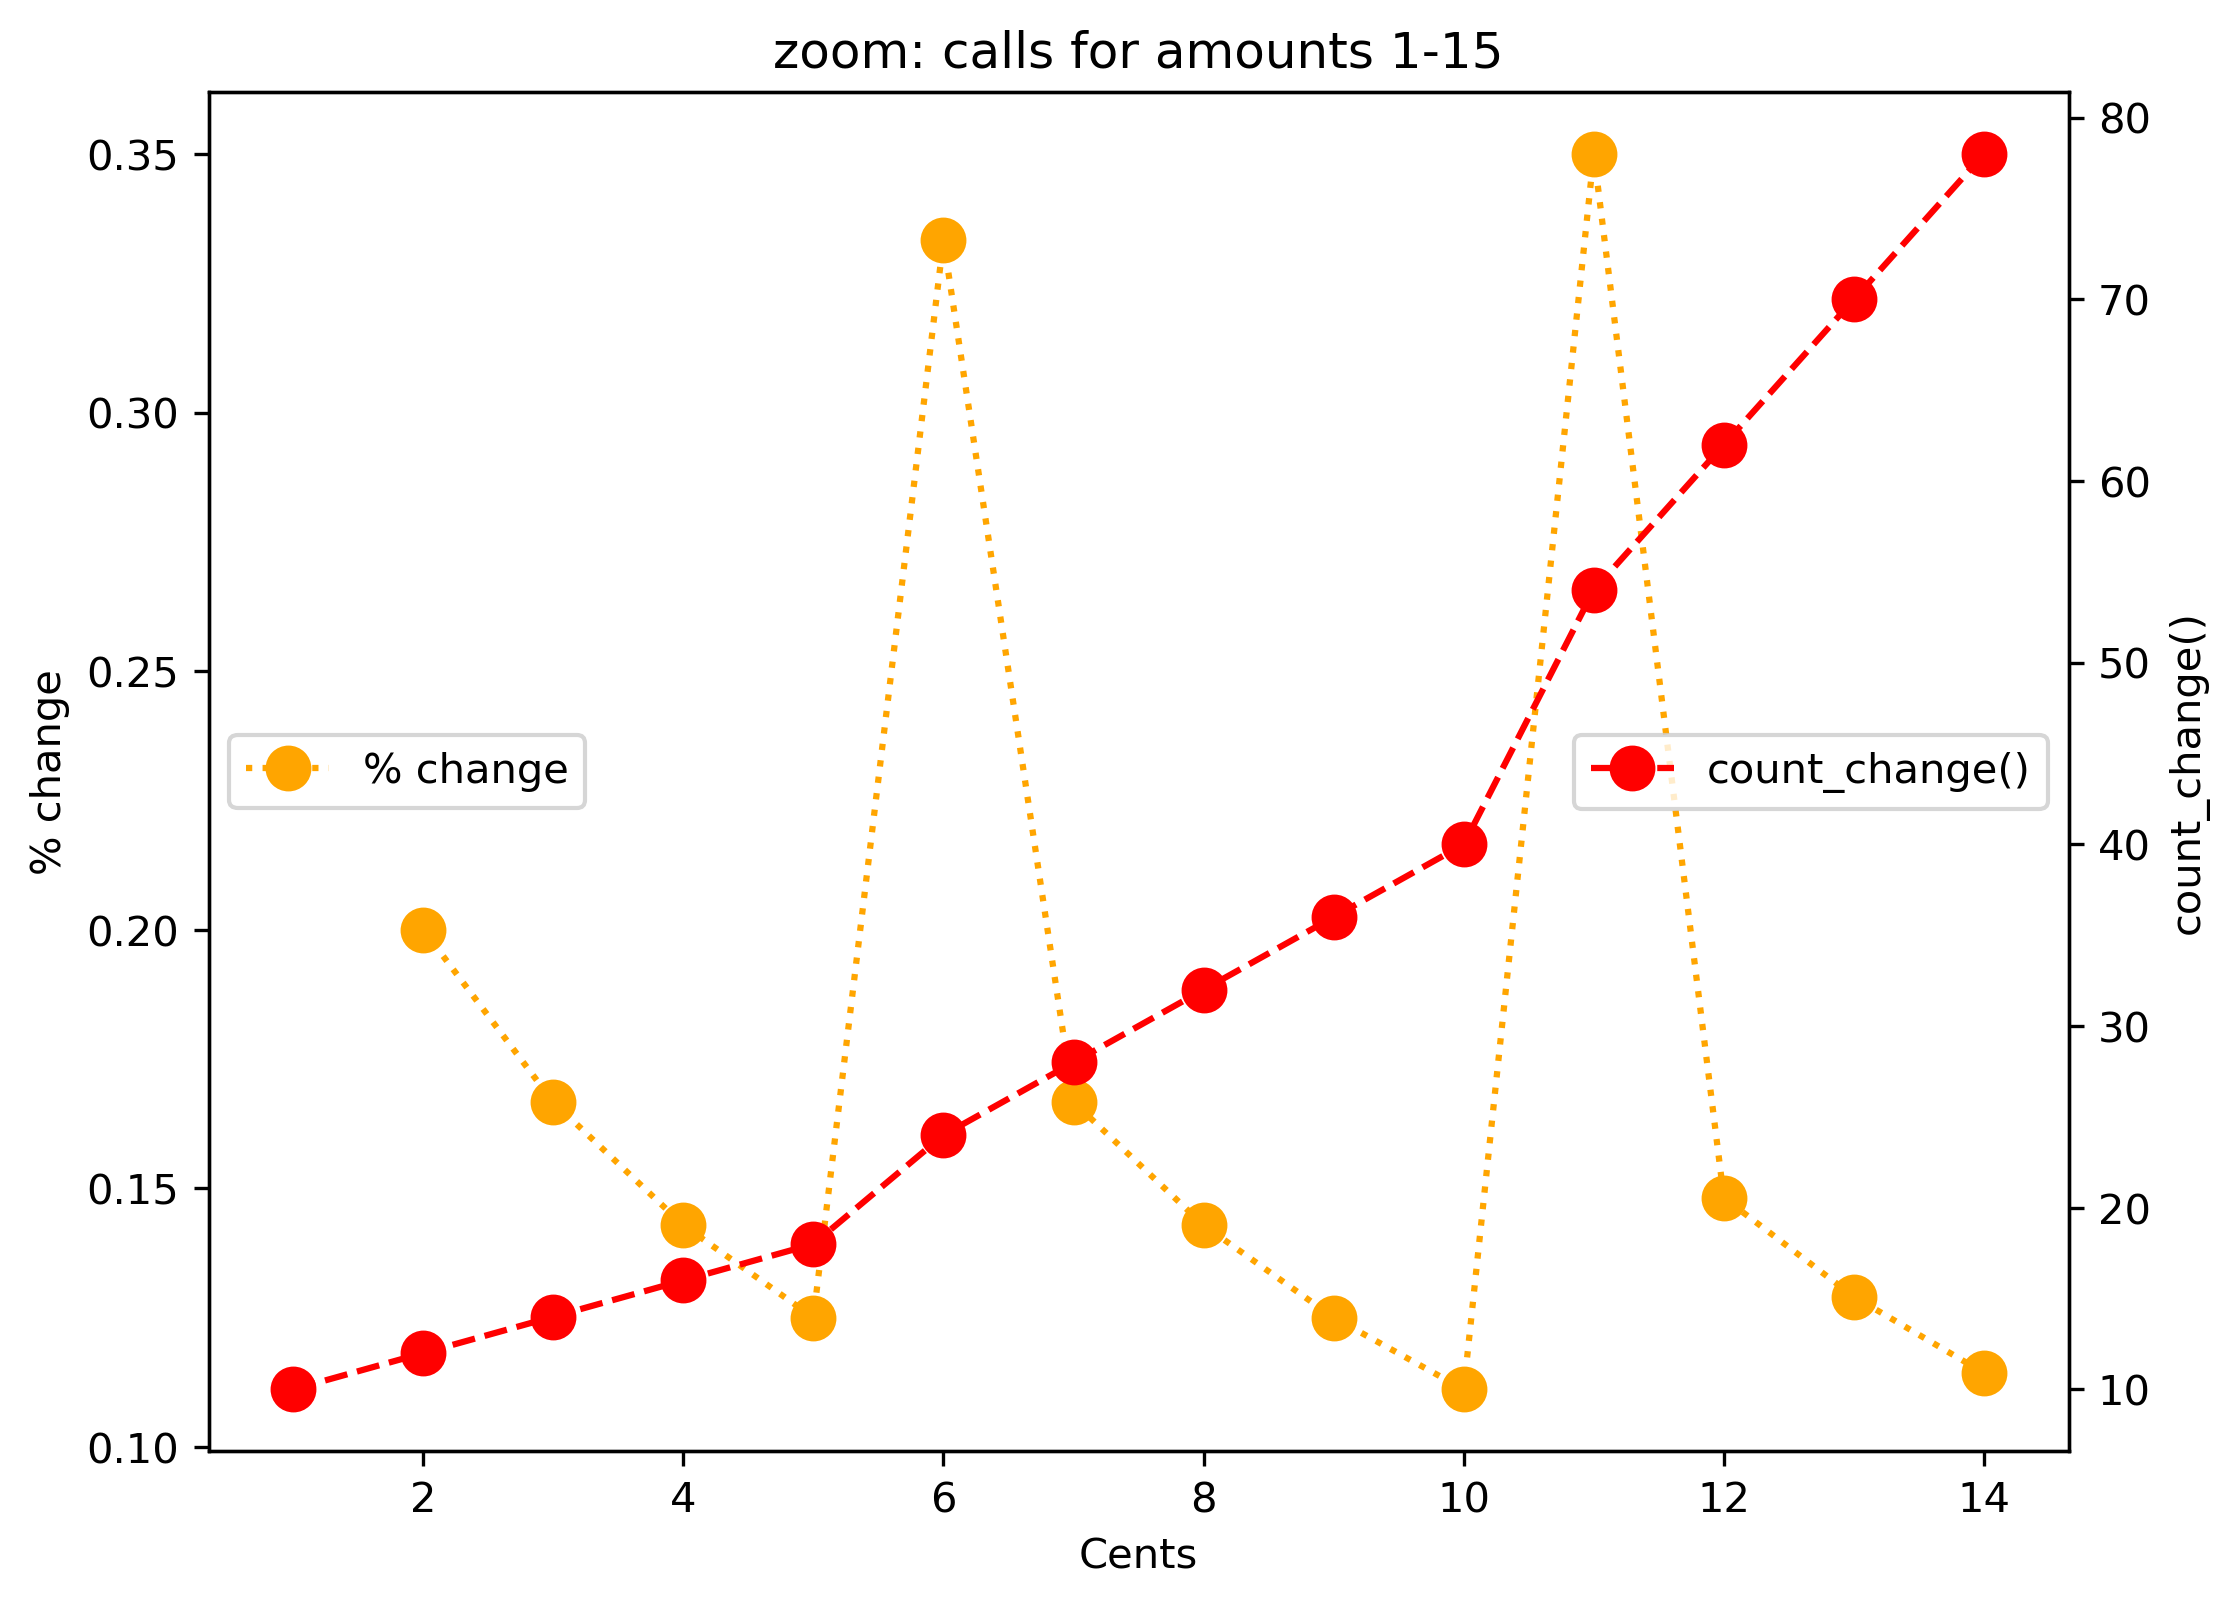

In [10]:
plt.plot(df.money[0:14], df.nodes_pct[0:14], label="% change", marker='o', linestyle='dotted', color='orange', ms=10); plt.ylabel("% change")
plt.xlabel("Cents")
plt.legend(loc='center left')
plt.twinx()
plt.plot(df.money[0:14], df.nodes[0:14], label="count_change()", marker='o', linestyle='dashed', color='red', ms=10); plt.ylabel("count_change()")
plt.legend(loc='center right')
plt.title("zoom: calls for amounts 1-15")